### 14. Qu'est ce que la métrique MAPE ? 

= Mean Absolute Percentage Error. Evalue la précision des modèles de prévision en calculant le pourcentage moyen d'erreur entre les valeurs réelles et les valeurs prévues. 

### 15. Quel est la particularité des train test split quand on travaille avec des séries temporelles?


Le découpage des données doit toujours suivre un ordre chronologique. On ne peut pas découper aléatoirement les données pour faire le train test split.

### 16. Comment peut-on faire une cross validation avec des séries temporelles?


On peut utiliser des techniques de validation croisée temporelle, telles que la validation croisée à fenêtres glissantes (time series cross-validation with rolling windows) ou la validation croisée à pas fixe (fixed-window time series cross-validation). Ces méthodes permettent d'effectuer plusieurs séparations d'entraînement-test en déplaçant progressivement la fenêtre temporelle de test à travers la série, ce qui peut fournir une évaluation plus robuste des performances du modèle.

### 17. A l’aide de Darts,  lancez un premier modèle de Naive Drift sur la série désaisonnalisée en réalisant un train test split (en gardant les deux dernières années en test) et en évaluant sur la MAPE.Représentez votre série et votre forecast


c:\Users\manon\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


MAPE : 1.36%


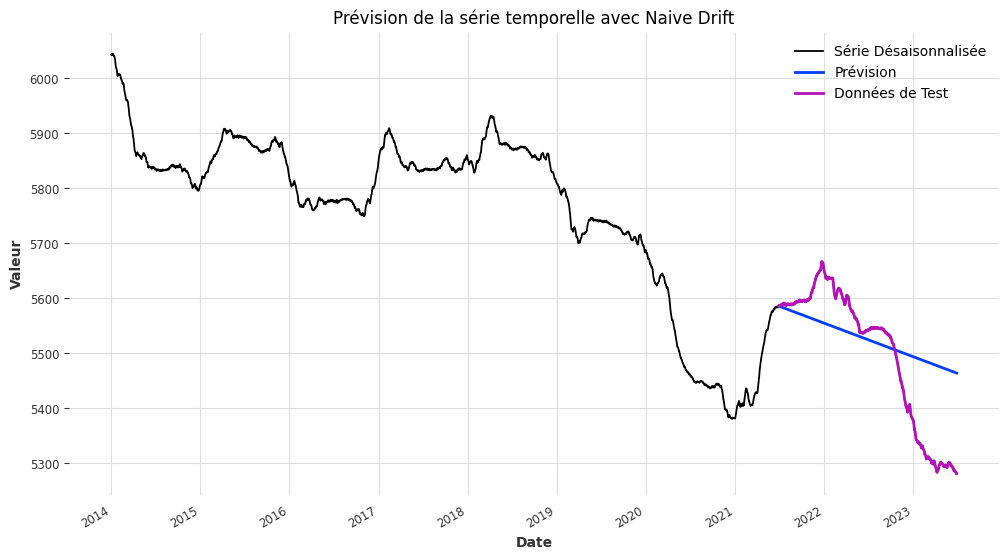

In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import NaiveDrift
from darts.metrics import mape
import matplotlib.pyplot as plt

# Charger votre série temporelle (par exemple, à partir d'un fichier CSV)
# Assurez-vous que la série est indexée par date/temps
# Par exemple, vous pouvez utiliser pandas pour charger la série
serie_temporelle = pd.read_csv('serie_desaisonnalisee.csv', parse_dates=['date'], index_col='date')

# Divisez la série en train et test (en gardant les deux dernières années en test)
test_length = 2 * 12  # Deux ans de données de test (12 mois par an)
train_series = TimeSeries.from_series(serie_temporelle[:-730])
test_series = TimeSeries.from_series(serie_temporelle[-730:])

# Créer un modèle Naive Drift
model = NaiveDrift()

# Adapter le modèle aux données d'entraînement
model.fit(train_series)

# Faire des prédictions sur les données de test
forecast = model.predict(730)

# Calcul de la MAPE
mape_score = mape(test_series, forecast)

# Afficher la MAPE
print(f"MAPE : {mape_score:.2f}%")

# Représentation graphique de la série, de la prévision et des données de test
plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle.index, serie_temporelle.values, label='Série Désaisonnalisée')
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec Naive Drift')
plt.show()


### 18. Faites la même chose à l’aide d’un Naive seasonal sur la série resample by day.
- Pourquoi pour cette série il n’est pas pratique d’utiliser le MAPE? 
- Quelle autre métrique choisir 


MAE : 445.13
MAPE : 10.50%


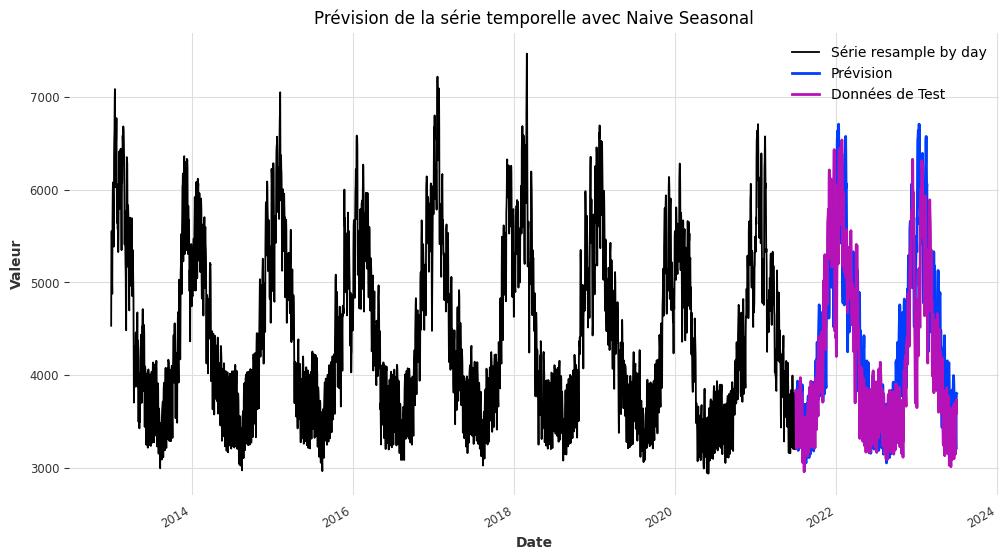

In [2]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import NaiveSeasonal
from darts.metrics import mae, rmse
import matplotlib.pyplot as plt

# Charger votre série temporelle (par exemple, à partir d'un fichier CSV)
# Assurez-vous que la série est indexée par date/temps
# Par exemple, vous pouvez utiliser pandas pour charger la série
serie_temporelle = pd.read_csv('conso-quotidienne.csv', sep=';', parse_dates=['date'], index_col='date')

serie_temporelle = serie_temporelle.consommation_brute_electricite_rte.resample('D').mean()

# Divisez la série en train et test (en gardant les deux dernières années en test)
test_length = 730  # Deux ans de données de test (12 mois par an)
train_series = TimeSeries.from_series(serie_temporelle[:-test_length])
test_series = TimeSeries.from_series(serie_temporelle[-test_length:])

# Créer un modèle Naive Seasonal
model = NaiveSeasonal(K=365)

# Adapter le modèle aux données d'entraînement
model.fit(train_series)

# Faire des prédictions sur les données de test
forecast = model.predict(test_length)

# Calcul de la MAPE
mae_score = mae(test_series, forecast)
mape_score = mape(test_series,forecast)

# Afficher la MAPE
print(f"MAE : {mae_score:.2f}")
print(f"MAPE : {mape_score:.2f}%")

# Représentation graphique de la série, de la prévision et des données de test
plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle.index, serie_temporelle.values, label='Série resample by day')
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec Naive Seasonal')
plt.show()

### 19. comparez les deux modèles créés précédemment (ARIMA manuel/ Auto Arima sur la série désaisonnalisée) en vous servant de darts et en utilisant la métrique MAPE.

c:\Users\manon\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE : 14.56%


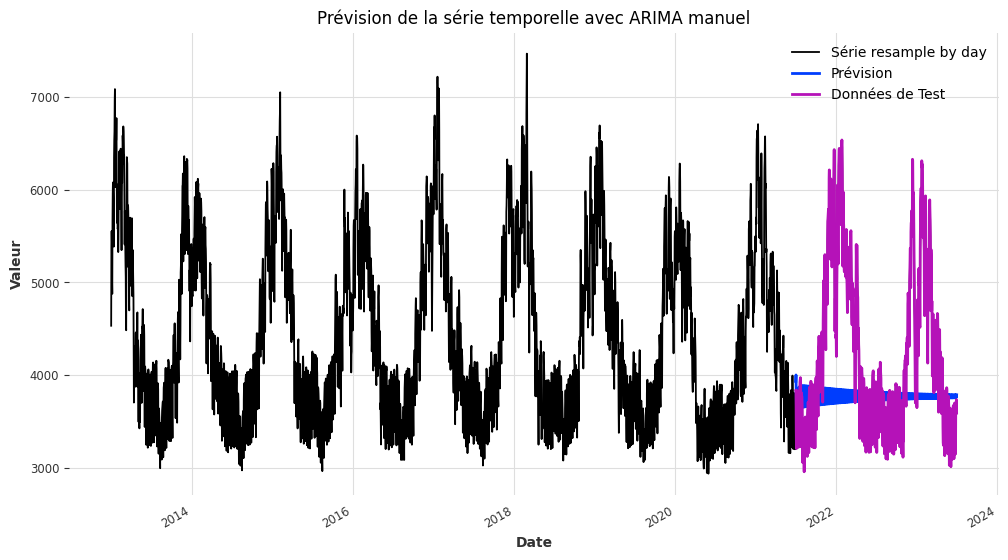

In [3]:
from darts.models import ARIMA
from darts.metrics import mape 

serie_temporelle = pd.read_csv('conso-quotidienne.csv', sep=';', parse_dates=['date'], index_col='date')
serie_temporelle = serie_temporelle.consommation_brute_electricite_rte.resample('D').mean()

test_length = 2 * 365  # Deux ans de données de test 
train_series = TimeSeries.from_series(serie_temporelle[:-test_length])
test_series = TimeSeries.from_series(serie_temporelle[-test_length:])

model = ARIMA(3, 1, 9)

model.fit(train_series)
forecast = model.predict(test_length)

mape_score = mape(test_series, forecast)

print(f'MAPE : {mape_score:.2f}%')

plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle.index, serie_temporelle.values, label='Série resample by day')
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec ARIMA manuel')
plt.show()

MAE : 834.51
MAPE : 21.03%


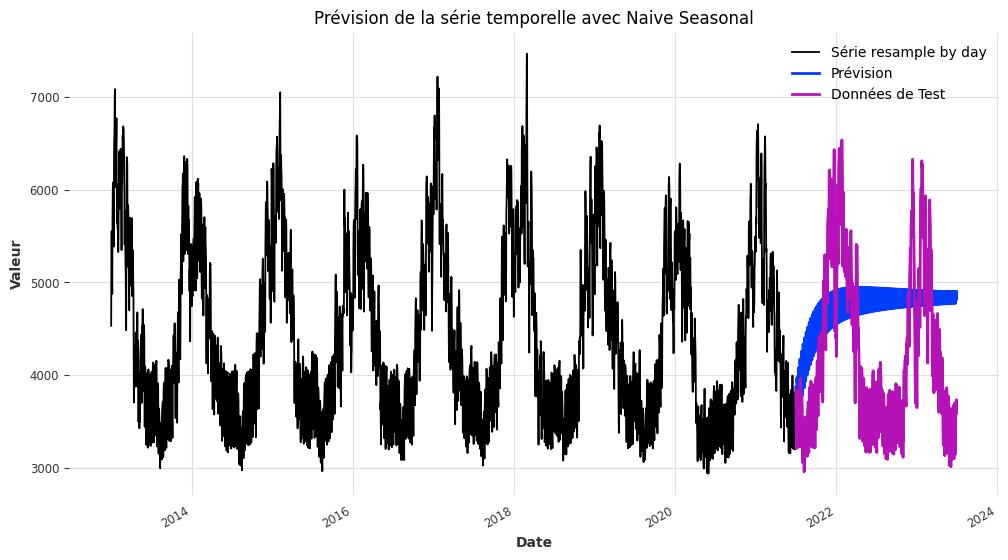

In [4]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import AutoARIMA
from darts.metrics import mae, rmse
import matplotlib.pyplot as plt

# Charger votre série temporelle (par exemple, à partir d'un fichier CSV)
# Assurez-vous que la série est indexée par date/temps
# Par exemple, vous pouvez utiliser pandas pour charger la série
serie_temporelle = pd.read_csv('conso-quotidienne.csv', sep=';', parse_dates=['date'], index_col='date')

serie_temporelle = serie_temporelle.consommation_brute_electricite_rte.resample('D').mean()

# Divisez la série en train et test (en gardant les deux dernières années en test)
test_length = 730  # Deux ans de données de test 
train_series = TimeSeries.from_series(serie_temporelle[:-test_length])
test_series = TimeSeries.from_series(serie_temporelle[-test_length:])

# Créer un modèle AutoARIMA
model = AutoARIMA()

# Adapter le modèle aux données d'entraînement
model.fit(train_series)

# Faire des prédictions sur les données de test
forecast = model.predict(test_length)

# Calcul de la MAPE
mae_score = mae(test_series, forecast)
mape_score = mape(test_series,forecast)

# Afficher la MAPE
print(f"MAE : {mae_score:.2f}")
print(f"MAPE : {mape_score:.2f}%")

# Représentation graphique de la série, de la prévision et des données de test
plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle.index, serie_temporelle.values, label='Série resample by day')
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec Naive Seasonal')
plt.show()

### 20.Lancez un modèle xgboost avec darts sur la série non désaisonnalisée en n’utilisant que des lags

MAE : 481.59
MAPE : 9.73%


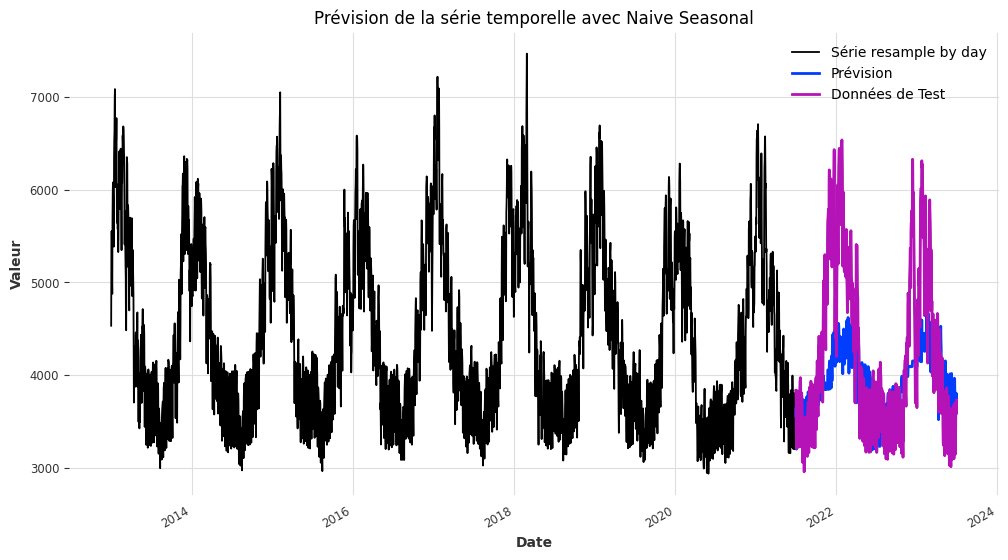

In [5]:
from darts.models import XGBModel

serie_temporelle = pd.read_csv('conso-quotidienne.csv', sep=';', parse_dates=['date'], index_col='date')

serie_temporelle = serie_temporelle.consommation_brute_electricite_rte.resample('D').mean()

test_length = 730  # Deux ans de données de test 
train_series = TimeSeries.from_series(serie_temporelle[:-test_length])
test_series = TimeSeries.from_series(serie_temporelle[-test_length:])

model = XGBModel(lags=3000)

# Adapter le modèle aux données d'entraînement
model.fit(train_series)

# Faire des prédictions sur les données de test
forecast = model.predict(test_length)

# Calcul de la MAPE
mae_score = mae(test_series, forecast)
mape_score = mape(test_series,forecast)

# Afficher la MAPE
print(f"MAE : {mae_score:.2f}")
print(f"MAPE : {mape_score:.2f}%")

# Représentation graphique de la série, de la prévision et des données de test
plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle.index, serie_temporelle.values, label='Série resample by day')
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec Naive Seasonal')
plt.show()


### 21. Lancez un modèle  xg boost avec darts sur la série non désaisonnalisée en utilisant les lags et les futures covariates suivantes: [année, mois, jour de la semaine].

In [39]:
from darts import TimeSeries
from darts.models import XGBModel
from darts.metrics import mae
import pandas as pd
import matplotlib.pyplot as plt

# Charger votre série temporelle à partir d'un DataFrame pandas
serie_temporelle = pd.read_csv('conso-quotidienne.csv',sep=';', parse_dates=['date'], index_col='date')

serie_temporelle = serie_temporelle.consommation_brute_electricite_rte.resample('D').mean()

time_series = TimeSeries.from_series(serie_temporelle)

# Spécifier le nombre de lags
lags = 3000

# Créer une série temporelle décalée (lag) pour les caractéristiques exogènes
exog_lagged = time_series.shift(lags)

# Créer des caractéristiques exogènes pour l'année, le mois et le jour de la semaine
exog_year = time_series.add_datetime_attribute(attribute='year')
exog_month = time_series.add_datetime_attribute(attribute='month')
exog_weekday = time_series.add_datetime_attribute(attribute='weekday')

# Combiner les trois séries temporelles en une seule
exog_future = pd.concat([exog_year[len(train_series):], exog_month[len(train_series):], exog_weekday[len(train_series):]], axis=1)

# Créer un modèle XGBoost
model = XGBModel(num_boost_round=100, objective="reg:squarederror", learning_rate=0.1,lags_future_covariates=[1,1,1])

# Ajuster le modèle aux données d'entraînement avec les covariates exogènes
model.fit(train_series, exog=exog_lagged[:len(train_series)],future_covariates=exog_future)

# Faire des prédictions sur les données de test avec les covariates exogènes
forecast = model.predict(test_length=len(test_series), future_covariates=exog_future)

# Évaluer la performance du modèle avec la MAE
mae_score = mae(test_series, forecast)
print(f"MAE : {mae_score:.2f}")

# Visualiser la série temporelle, les prédictions et les données de test
plt.figure(figsize=(12, 6))
time_series.plot(label='Série Temporelle', lw=2)
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec XGBoost et futures covariates')
plt.show()


<TimeSeries (DataArray) (date: 1, component: 2, sample: 1)>
array([[[4532.96985816],
        [2013.        ]]])
Coordinates:
  * date       (date) datetime64[ns] 2013-01-01
  * component  (component) object 'consommation_brute_electricite_rte' 'year'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


TypeError: cannot concatenate object of type '<class 'darts.timeseries.TimeSeries'>'; only Series and DataFrame objs are valid

### 22.Lancez un modèle prophète

In [6]:
from darts.models import Prophet

serie_temporelle = pd.read_csv('conso-quotidienne.csv',sep=';', parse_dates=['date'], index_col='date')

serie_temporelle = serie_temporelle.consommation_brute_electricite_rte.resample('D').mean()

test_length = 730  # Deux ans de données de test 
train_series = TimeSeries.from_series(serie_temporelle[:-test_length])
test_series = TimeSeries.from_series(serie_temporelle[-test_length:])

model = Prophet()

# Adapter le modèle aux données d'entraînement
model.fit(train_series)

# Faire des prédictions sur les données de test
forecast = model.predict(test_length)

# Calcul de la MAPE
mae_score = mae(test_series, forecast)
mape_score = mape(test_series,forecast)

# Afficher la MAPE
print(f"MAE : {mae_score:.2f}")
print(f"MAPE : {mape_score:.2f}%")

# Représentation graphique de la série, de la prévision et des données de test
plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle.index, serie_temporelle.values, label='Série resample by day')
forecast.plot(label='Prévision', lw=2)
test_series.plot(label='Données de Test', lw=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prévision de la série temporelle avec Naive Seasonal')
plt.show()


11:12:30 - cmdstanpy - INFO - Chain [1] start processing
11:12:30 - cmdstanpy - INFO - Chain [1] done processing
11:12:30 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
11:12:30 - cmdstanpy - INFO - Chain [1] start processing
11:12:30 - cmdstanpy - INFO - Chain [1] done processing
11:12:30 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\manon\AppData\Local\Programs\Python\Python310\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=66205 data file=C:\Users\manon\AppData\Local\Temp\tmphc8rzyg3\445kvq56.json init=C:\Users\manon\AppData\Local\Temp\tmphc8rzyg3\nrzl77ec.json output file=C:\Users\manon\AppData\Local\Temp\tmphc8rzyg3\prophet_modelafoischn\prophet_model-20230919111230.csv method=optimize algorithm=newton iter=10000' failed: 

### 23. BONUS: récoltez des données météo et lancez un modèle VARIMA (série désaisonnalisée), un  xgboost (série originelle) (https://odre.opendatasoft.com/explore/dataset/temperature-quotidienne-regionale/export/?disjunctive.region&sort=date&refine.region=Hauts-de-France)


c:\Users\manon\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


MAPE : 102.98%


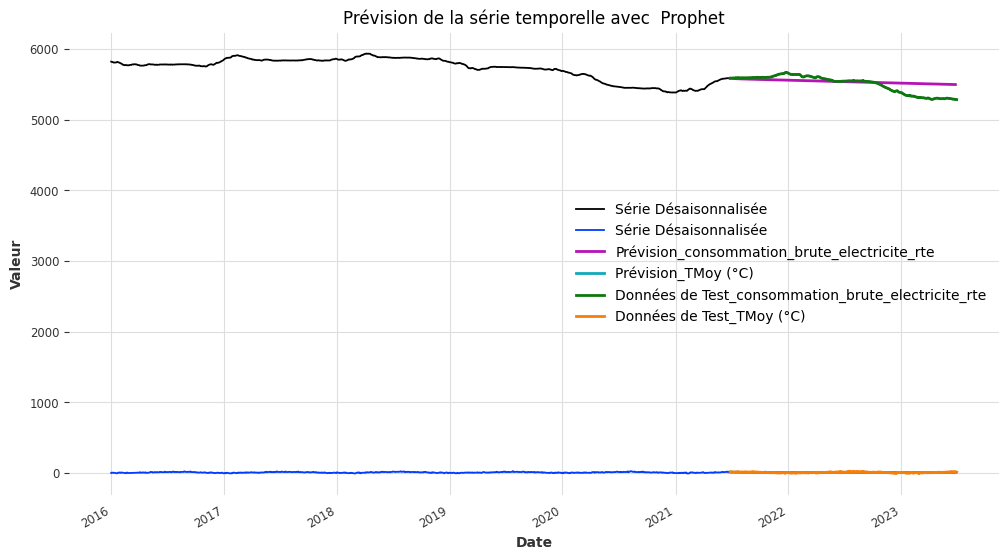

In [16]:
from darts.models import VARIMA
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.metrics import mape
import matplotlib.pyplot as plt

# Charger votre série temporelle (par exemple, à partir d'un fichier CSV)
# Assurez-vous que la série est indexée par date/temps
# Par exemple, vous pouvez utiliser pandas pour charger la série
serie_temporelle = pd.read_csv('serie_desaisonnalisee.csv', parse_dates=['date'], index_col='date')

donnees_meteo = pd.read_csv('temperature-quotidienne-regionale.csv',sep=';', parse_dates=['Date'], index_col='Date')

donnees_meteo = donnees_meteo['TMoy (°C)']

serie_combinee = serie_temporelle.join(donnees_meteo)

serie_combinee = serie_combinee.dropna()
# # Divisez la série en train et test (en gardant les deux dernières années en test)
test_length = 2 * 365  # Deux ans de données de test (12 mois par an)
train_series = TimeSeries.from_series(serie_combinee[:-730], freq='D')
test_series = TimeSeries.from_series(serie_combinee[-730:],freq='D')

# # Créer un modèle VARIMA
model = VARIMA()

# # Adapter le modèle aux données d'entraînement
model.fit(train_series)

# # Faire des prédictions sur les données de test
forecast = model.predict(730)

# # Calcul de la MAPE
mape_score = mape(test_series, forecast)

# # Afficher la MAPE
print(f"MAPE : {mape_score:.2f}%")


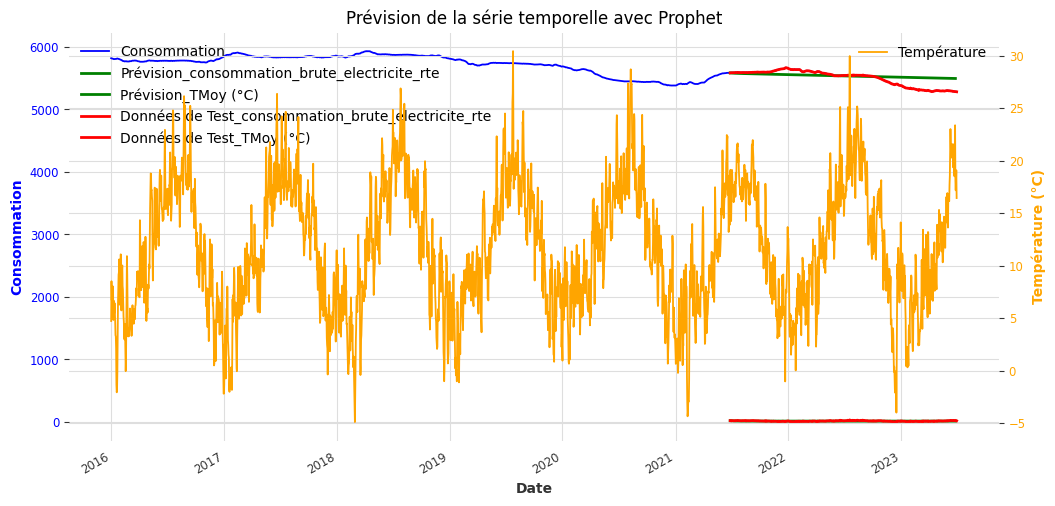

In [17]:
import matplotlib.pyplot as plt

# Créer une figure et un premier axe Y (à gauche)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer la série de consommation sur l'axe Y de gauche
serie_combinee['consommation_brute_electricite_rte'].plot(ax=ax1, label='Consommation', color='blue')
forecast.plot(label='Prévision', lw=2, color='green')
test_series.plot(label='Données de Test', lw=2, color='red')

# Personnaliser l'axe Y de gauche
ax1.set_xlabel('Date')
ax1.set_ylabel('Consommation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Créer un deuxième axe Y (à droite)
ax2 = ax1.twinx()

# Tracer la série de température sur l'axe Y de droite
serie_combinee['TMoy (°C)'].plot(ax=ax2, label='Température', color='orange')

# Personnaliser l'axe Y de droite
ax2.set_ylabel('Température (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Titre du graphique
plt.title('Prévision de la série temporelle avec Prophet')

# Afficher le graphique
plt.show()
